In [25]:
!pip install python-docx


In [26]:

from google.colab import files
from docx import Document

uploaded_files = files.upload()

file_name = "General Election 2024 (Dawn News).docx"


def read_docx(file_path):
    doc = Document(file_path)
    for para in doc.paragraphs:
        print(para.text)


if file_name in uploaded_files:
    read_docx(file_name)
else:
    print("File not found. Please upload the correct file.")


Saving General Election 2024 (Dawn News).docx to General Election 2024 (Dawn News) (2).docx
File not found. Please upload the correct file.


In [27]:
## EDA

In [28]:
!pip install nltk matplotlib wordcloud python-docx


In [29]:
## Basic Text Exploration

In [30]:
import docx

doc = docx.Document('General Election 2024 (Dawn News).docx')
full_text = []
for para in doc.paragraphs:
    full_text.append(para.text)
text = '\n'.join(full_text)


words = text.split()
num_words = len(words)
num_sentences = text.count('.')
unique_words = len(set(words))

print("Total number of words:", num_words)
print("Total number of sentences:", num_sentences)
print("Number of unique words:", unique_words)


Total number of words: 5517
Total number of sentences: 261
Number of unique words: 1925


In [31]:
## Text Cleaning

In [32]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

cleaned_text = clean_text(text)
print(cleaned_text)


1 paradox election 2024 pakistan goes polls today amid despair uncertainty many outcome already decided one largest political parties effectively forced race yet surprises cannot ruled whatever result 2024 polls huge impact future course pakistani politics important question would change country’s power equation pti virtually equation stage seems set nawaz sharif’s return power resurrection threetime prime minister tells story evershifting sands pakistani politics however yet polls could throw many surprises large turnout could defy odds return large number ‘independents’ could alter entire power game fragmented mandate could push country’s politics onto uncharted territory sharif’s dream crowned fourth time may prove elusive let us wait new episode game thrones postfeb 8 latest conviction incarcerated former prime minister imran khan entering matrimony allegedly iddat former first lady days polls demonstrates desperation completely block party electoral process khan’s third conviction

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
## Text Visualization

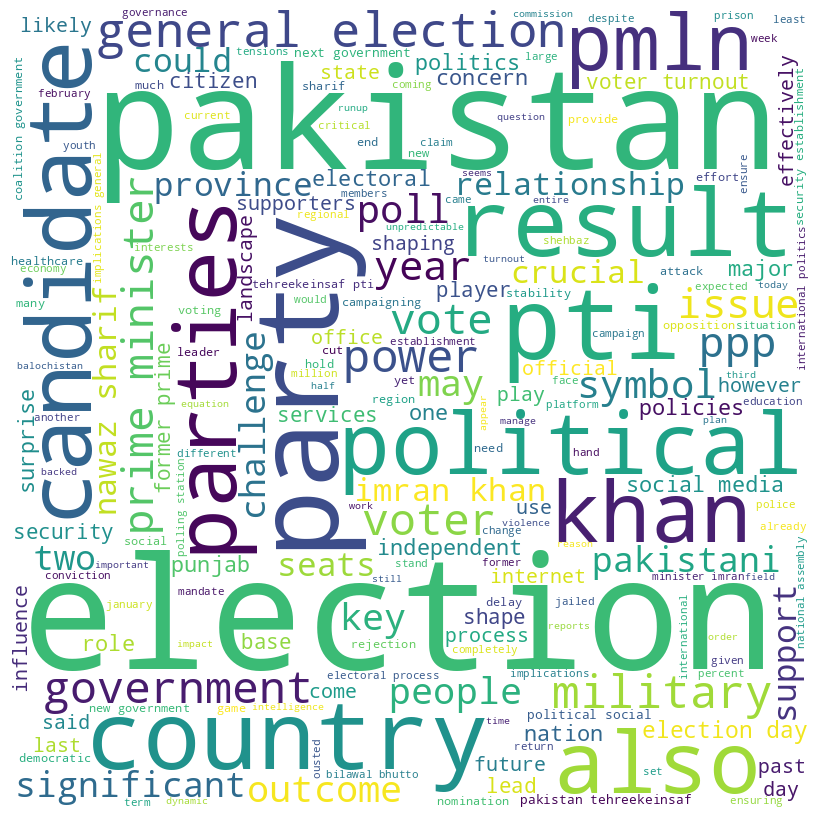

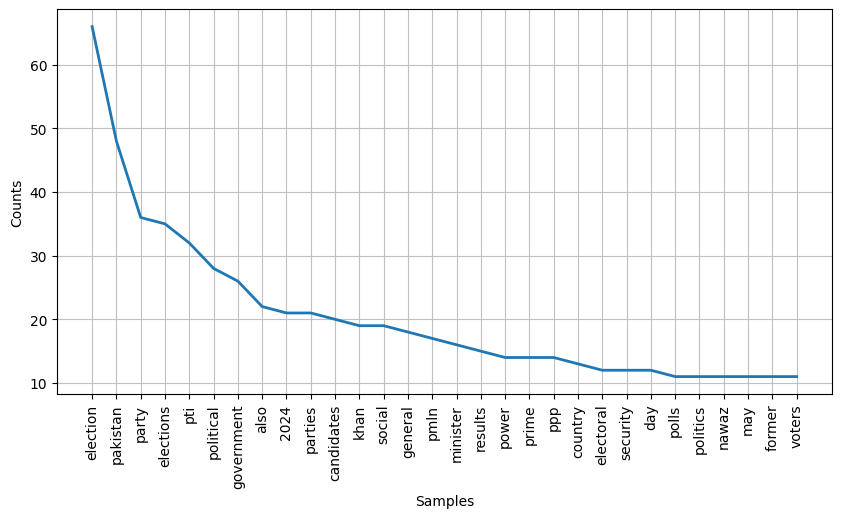

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(cleaned_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


freq_dist = nltk.FreqDist(cleaned_text.split())
plt.figure(figsize=(10,5))
freq_dist.plot(30)


In [35]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:

full_text_scores = sia.polarity_scores(cleaned_text)
print("Full text sentiment scores:", full_text_scores)

sentences = cleaned_text.split('.')
sentence_scores = [sia.polarity_scores(sentence) for sentence in sentences]
for i, score in enumerate(sentence_scores):
    print(f"Sentence {i+1} sentiment scores:", score)


Full text sentiment scores: {'neg': 0.105, 'neu': 0.707, 'pos': 0.188, 'compound': 0.9998}
Sentence 1 sentiment scores: {'neg': 0.105, 'neu': 0.707, 'pos': 0.188, 'compound': 0.9998}


In [37]:
## Compound

In [38]:
def interpret_compound(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


overall_sentiment = interpret_compound(full_text_scores['compound'])
print("Overall Sentiment of the Text:", overall_sentiment)


Overall Sentiment of the Text: Positive
